## BSM Black-Scholes-Merton

Black and Scholes (1973)

Merton (1973)

---

$$
C_0^* = C^{BSM}(S_0, K, T, r, \sigma)
$$

The fair present value of a European call option $C_0^*$ is given by the BSM formula $C^{BSM}(\cdot)$ which takes as input parameters
* $S_0$ the current index level
* $K$ the strike price of the option
* $T$ the maturity date (equals time-to-maturity viewed from the present date)
* $r$ the constant riskless short rate
* $\sigma$ the volatility of the index (i.e., the standard deviation of the index level returns)

---

In [5]:
import numpy as np
import numpy.random as npr

from scipy.integrate import quad

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = 'serif'

import math

---

In [6]:
def dN (x):
    ''' Probability density function of standard normal random variable x. '''
    return math.exp(-0.5 * x ** 2) / math.sqrt(2 * math.pi)

def N (d):
    ''' Cumulative density function of standard normal random variable x. '''
    return quad(lambda x: dN(x), -20, d, limit=50)[0]

def d1f (St, K, t, T, r, sigma):
    ''' Black-Scholes-Merton d1 function.
        Parameters see e.g. BSM_call_value function. '''
    d1 = (math.log(St / K) + (r + 0.5 * sigma ** 2) * (T - t)) / (sigma * math.sqrt(T - t))
    return d1

def BSM_call_value (St, K, t, T, r, sigma):
    ''' Calculates Black-Scholes-Merton European call option value.
    
    Parameters
    ==========
    St : float
        stock/index level at time t
    K : float
        strike price
    t : float
        valuation date
    T : float
        date of maturity/time-to-maturity if t = 0; T > t
    r : float
        constant, risk-less short rate
    sigma : float
        volatility
        
    Returns
    =======
    call_value : float
        European call present value at t
    '''
    d1 = d1f(St, K, t, T, r, sigma)
    d2 = d1 - sigma * math.sqrt(T - t)
    call_value = St * N(d1) - math.exp(-r * (T - t)) * K * N(d2)
    return call_value

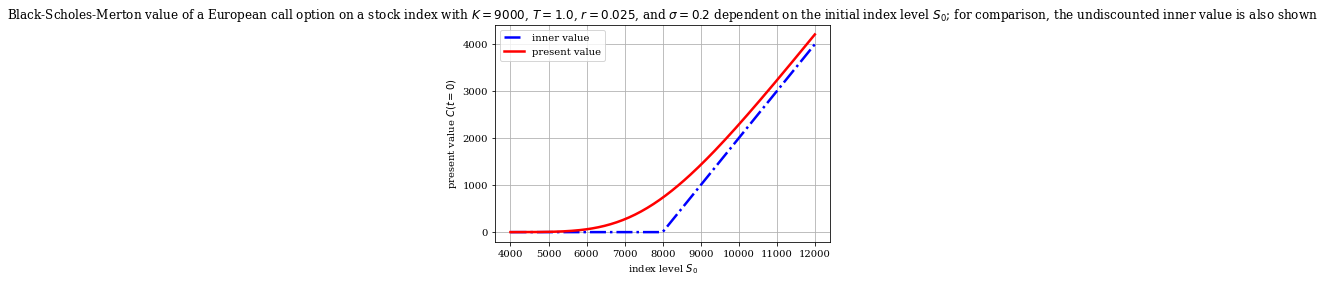

In [7]:
K = 8000  # strike price
T = 1.0   # time-to-maturity
r = 0.025 # constant, risk-less short rate
vol = 0.2 # constant volatility

S = np.linspace(4000, 12000, 150)                     # vector of index level values
h = np.maximum(S - K, 0)                              # inner value of option
C = [BSM_call_value(S0, K, 0, T, r, vol) for S0 in S] # calculate the call option values

plt.figure()
plt.plot(S, h, 'b-.', lw=2.5, label='inner value')    # plot the inner value at maturity
plt.plot(S, C, 'r', lw=2.5, label='present value')    # plot option present value
plt.grid(True)
plt.legend(loc=0)
plt.xlabel('index level $S_0$')
plt.ylabel('present value $C(t=0)$')
plt.title('Black-Scholes-Merton value of a European call option on a stock index with $K = 9000$, $T = 1.0$, $r = 0.025$, and $\sigma = 0.2$ dependent on the initial index level $S_0$; for comparison, the undiscounted inner value is also shown');

The present value of the option is always above the undiscounted inner value. The difference between the two is referred to as the time value of the option. The option's present value is composed of the inner value plus the time value. Time value is suggestive of the fact that the option still has time to get in-the-money or to get even more in-the-money.

---